<a href="https://colab.research.google.com/github/nitesh-singh-datascience/team-power-telecom-churn-analysis/blob/Nilanjan/Nilanjan_Chandra_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [5]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhiaK57slMw9OP1wHn0FjZkhoGYELANZFeE6Bnt_SIOz6KN2VfoPCc
Mounted at /content/drive


In [6]:
working_dir_path= '/content/drive/MyDrive/AlmaBetter/Colab Notebooks/AlmaBetter/Module 1 Python for data science/Week6 First Capstone Project/Data/'
df=pd.read_csv(working_dir_path + '/Telecom Churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.groupby('Churn')['Total day calls'].sum()

Churn
False    285807
True      48945
Name: Total day calls, dtype: int64

In [ ]:
#To check dependency on State or in which states the churn customer is more
df.groupby(['State','Churn'],as_index=True).agg({'Churn':"count"})

In [ ]:
df['State'].nunique()

51

In [ ]:
statedata=df.groupby(['State','Churn'],as_index= True)['Churn'].count().unstack()
statedata

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [ ]:
statedata['Churn ratio']=statedata[True]/(statedata[False]+statedata[True])
statedata.sort_values(by='Churn ratio', ascending=False)

Churn,False,True,Churn ratio
State,,,
NJ,50,18,0.264706
CA,25,9,0.264706
TX,54,18,0.250000
MD,53,17,0.242857
SC,46,14,0.233333
MI,57,16,0.219178
MS,51,14,0.215385
NV,52,14,0.212121
WA,52,14,0.212121


In [ ]:
#To check in which states , the atttrition ratio is highrer than the average

higherattritionstate=statedata[statedata['Churn ratio']>statedata['Churn ratio'].mean()]
higherattritionstate.sort_values(by='Churn ratio', ascending=False)


Churn,False,True,Churn ratio
State,,,
NJ,50,18,0.264706
CA,25,9,0.264706
TX,54,18,0.250000
MD,53,17,0.242857
SC,46,14,0.233333
MI,57,16,0.219178
MS,51,14,0.215385
NV,52,14,0.212121
WA,52,14,0.212121


So the network facility can be improved for the top twelve states where the churn ratio is more than 20 % 

In [24]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline



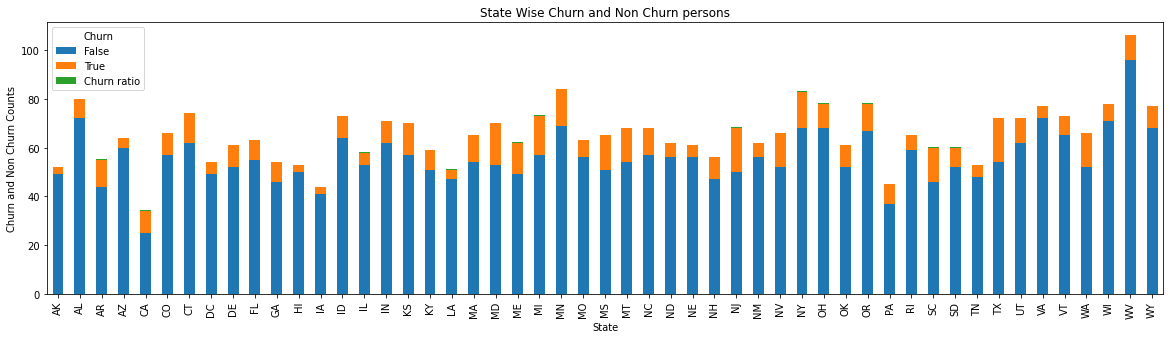

In [ ]:
statedata.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (40, 10)
plt.title('State Wise Churn and Non Churn persons')
plt.ylabel('Churn and Non Churn Counts')
plt.xlabel('State')
plt.show()

In [ ]:
#To understand how variables are distributed (Univariate Analysis)

#plt.figure(1)
#fig, ax = plt.subplots(figsize=(10,10))
#plt.subplot(2,2,1)
#plt.hist(df['Total day minutes'], bins = 100)

#plt.subplot(2,2,2)
#plt.hist(df['Total eve minutes'], bins = 100)


#plt.subplot(2,2,3)
#plt.hist(df['Total night minutes'], bins = 10)

#plt.subplot(2,2,4)
#plt.hist(df['Total intl minutes'], bins = 100)

#plt.show()


In [ ]:

Num_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls","Churn"]
Categorical_columns = ["State", "Area code", "International plan", "Voice mail plan"]
Target = ["Churn"]


Numeric_df = df[Num_columns]
Categorical_df = df[Categorical_columns]
Target_df = df[Target]


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

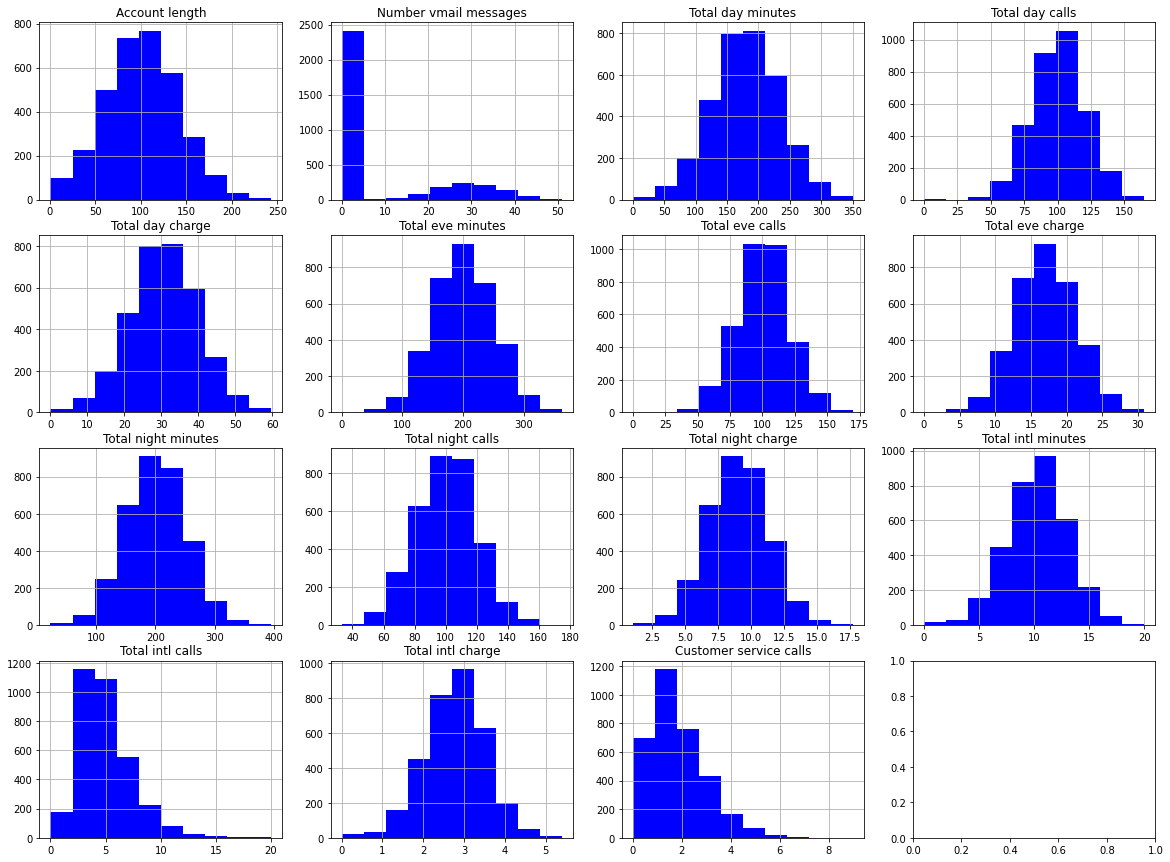

In [ ]:
Numeric_df.hist(figsize=(20,15),color='b')




In [ ]:
#BiVariate Analysis
#dependency on Customer service calls
data1=df.groupby(['Customer service calls','Churn'],as_index= True)['Churn'].count().unstack()
data1

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
data2=pd.DataFrame(data1)

In [ ]:
def ratiochurn(a,b): 
  Churn_Ratio=a/(b+a)
  return Churn_Ratio

In [ ]:
data2['Churn Ratio'] = data2.apply(lambda x: ratiochurn(x[True], x[False]),axis=1)
data2[False]=data2[False].fillna(0)
data2

Churn,False,True,Churn Ratio
Customer service calls,,,
0,605.0,92.0,0.131994
1,1059.0,122.0,0.103302
2,672.0,87.0,0.114625
3,385.0,44.0,0.102564
4,90.0,76.0,0.457831
5,26.0,40.0,0.606061
6,8.0,14.0,0.636364
7,4.0,5.0,0.555556
8,1.0,1.0,0.500000


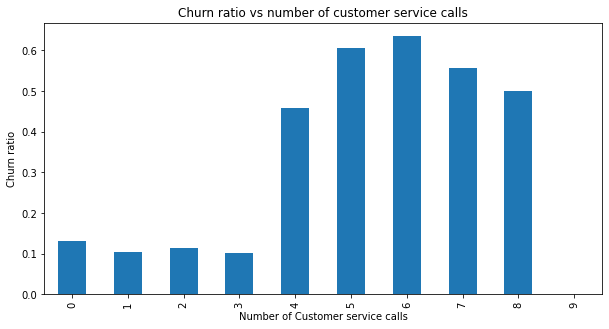

In [ ]:
data3=data2['Churn Ratio']
data3.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Churn ratio vs number of customer service calls')
plt.ylabel('Churn ratio')
plt.xlabel('Number of Customer service calls')
plt.show()

In [ ]:
#Dependency on International Plan
Intl_plan=df.groupby(['International plan','Churn'],as_index= True)['Churn'].count().unstack()
Intl_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


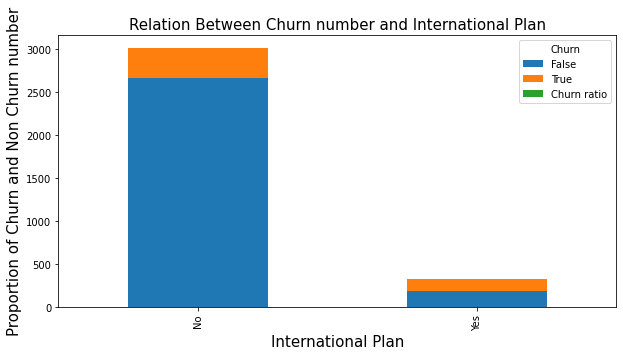

In [ ]:
Intl_plan.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Relation Between Churn number and International Plan', Fontsize=15)
plt.ylabel('Proportion of Churn and Non Churn number',Fontsize=15)
plt.xlabel('International Plan', Fontsize=15)
plt.show()

In [ ]:
Intl_plan['Churn ratio']=Intl_plan[True]/(Intl_plan[False]+Intl_plan[True])

In [ ]:
Intl_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


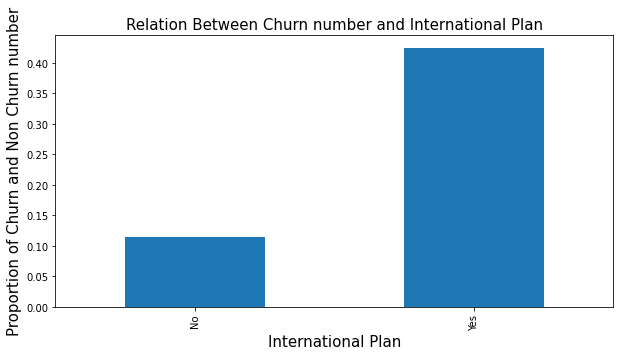

In [ ]:
data4=Intl_plan['Churn ratio']
data4.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Relation Between Churn number and International Plan',Fontsize=15)
plt.ylabel('Proportion of Churn and Non Churn number',Fontsize=15)
plt.xlabel('International Plan',Fontsize=15)
plt.show()

In [ ]:
International_plan=df.groupby(['International plan', 'Churn']).size()
International_plan

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
dtype: int64

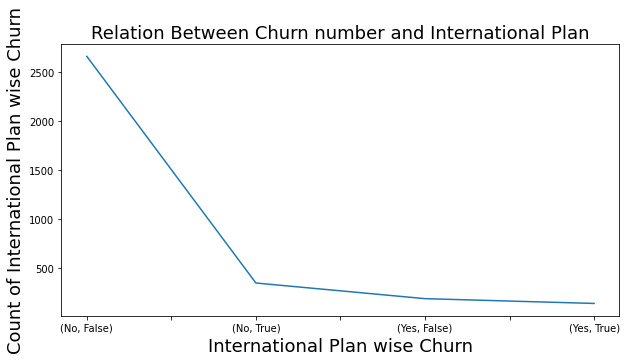

In [ ]:
International_plan.plot()
plt.xlabel('International Plan wise Churn', fontsize=18)
plt.ylabel('Count of International Plan wise Churn', fontsize=18)
plt.title('Relation Between Churn number and International Plan',fontsize=18)

plt.show()

In [ ]:
#Dependency on Voice mail plan
Voicemail=df.groupby(['Voice mail plan','Churn'],as_index= True)['Churn'].count().unstack()
Voicemail

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


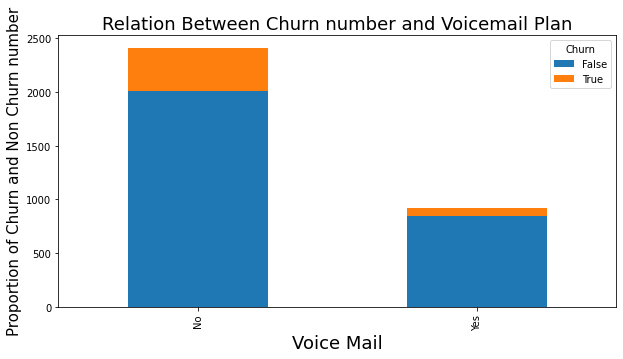

In [ ]:
Voicemail.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Relation Between Churn number and Voicemail Plan',fontsize=18)
plt.ylabel('Proportion of Churn and Non Churn number',fontsize=15)
plt.xlabel('Voice Mail',fontsize=18)
plt.show()

In [ ]:
Voicemail_Churn=df.groupby(['Voice mail plan', 'Churn']).size()
Voicemail_Churn

Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
dtype: int64

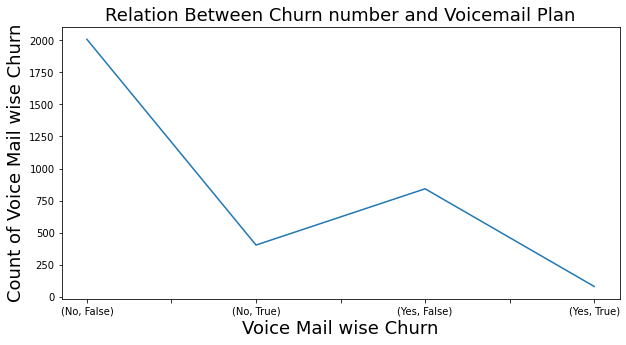

In [ ]:

Voicemail_Churn.plot()
plt.xlabel('Voice Mail wise Churn', fontsize=18)
plt.ylabel('Count of Voice Mail wise Churn', fontsize=18)
plt.title('Relation Between Churn number and Voicemail Plan',fontsize=18)

plt.show()

In [ ]:
#Dependency on Area Code
Area=df.groupby(['Area code','Churn'],as_index= True)['Churn'].count().unstack()
Area

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


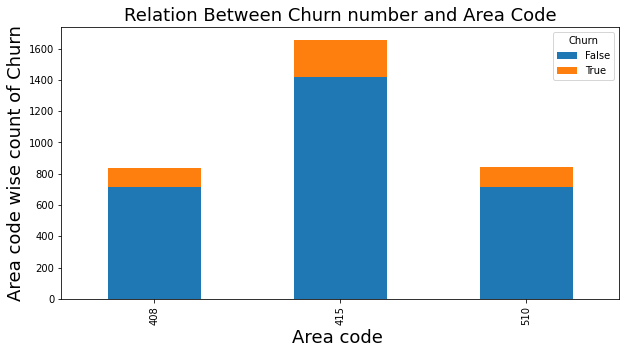

In [ ]:
Area.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.xlabel('Area code ', fontsize=18)
plt.ylabel('Area code wise count of Churn', fontsize=18)
plt.title('Relation Between Churn number and Area Code',fontsize=18)

plt.show()

In [ ]:
Area['Churn ratio']=Area[True]/(Area[False]+Area[True])

In [ ]:
Area

Churn,False,True,Churn ratio
Area code,,,
408,716,122,0.145585
415,1419,236,0.142598
510,715,125,0.148810


In [ ]:
#To check correlation between the variables
corr_df =df.corr()
corr_df




,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


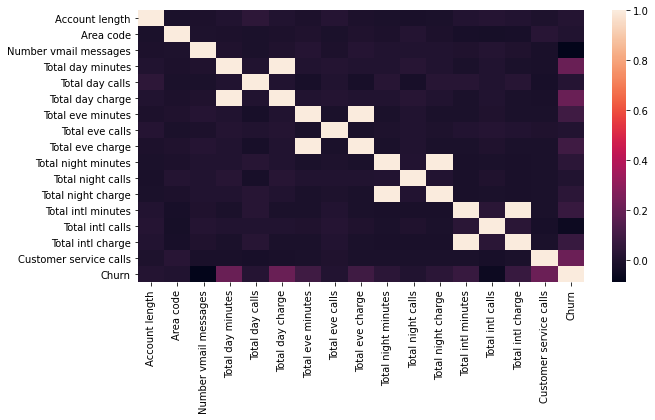

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

In [ ]:
#Dependency on all type total calls and all type total minutes vs Churn via box plot

Text(0.5, 1.0, 'Bivariate Relation between Total Voice call and Churn')

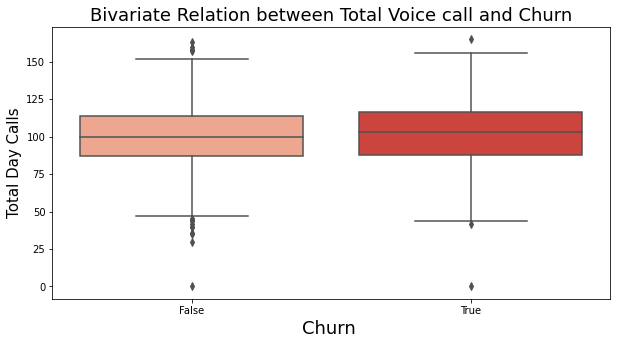

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total day calls',palette = "Reds")
plt.ylabel('Total Day Calls', fontsize = 15)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Voice call and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total Evening call and Churn')

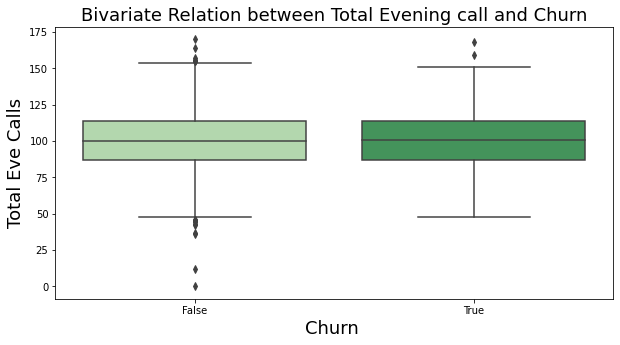

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total eve calls',palette = "Greens")
plt.ylabel('Total Eve Calls', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Evening call and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total Night call and Churn')

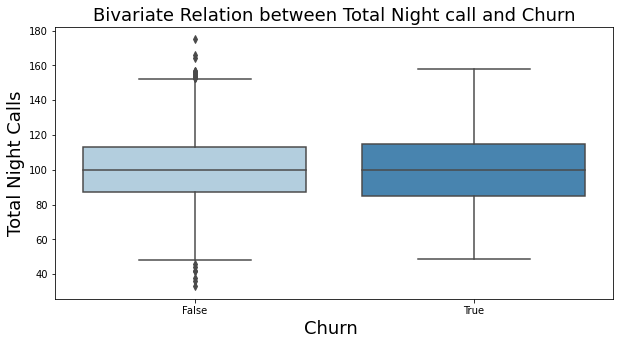

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total night calls',palette = "Blues")
plt.ylabel('Total Night Calls', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Night call and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total International call and Churn')

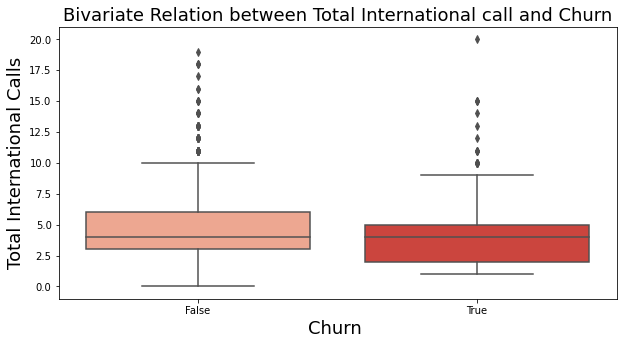

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total intl calls',palette = "Reds")
plt.ylabel('Total International Calls', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total International call and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total Day Minutes and Churn')

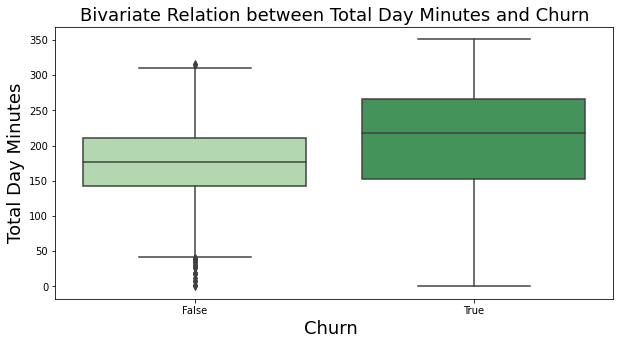

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total day minutes',palette = "Greens")
plt.ylabel('Total Day Minutes', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Day Minutes and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total Evening Minutes and Churn')

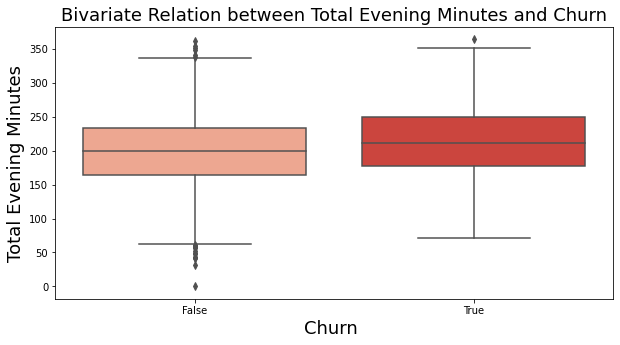

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total eve minutes',palette = "Reds")
plt.ylabel('Total Evening Minutes', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Evening Minutes and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total Night Minutes and Churn')

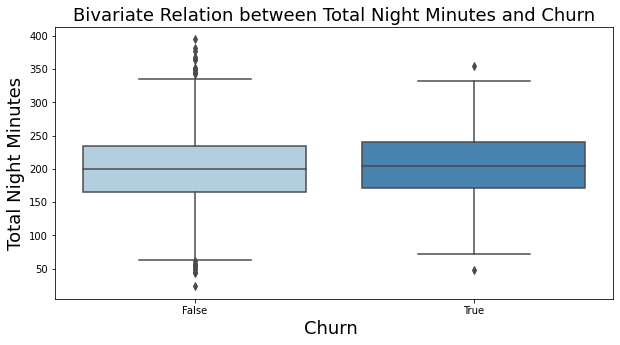

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total night minutes',palette = "Blues")
plt.ylabel('Total Night Minutes', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total Night Minutes and Churn',fontsize=18)

Text(0.5, 1.0, 'Bivariate Relation between Total International Minutes and Churn')

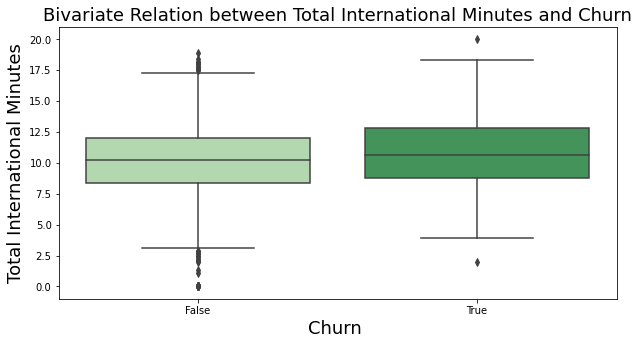

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total intl minutes',palette = "Greens")
plt.ylabel('Total International Minutes', fontsize = 18)
plt.xlabel('Churn ', fontsize=18)
plt.title('Bivariate Relation between Total International Minutes and Churn',fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

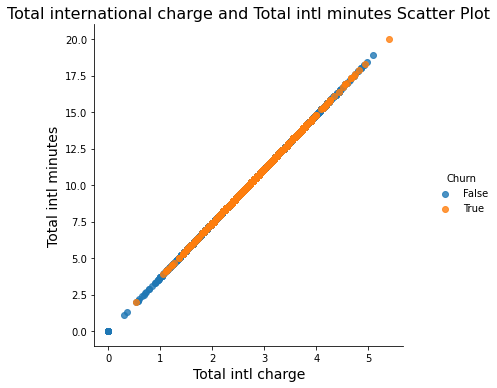

In [34]:
#Scatter plot Analysis

fig = plt.figure()
fig = sns.lmplot('Total intl charge','Total intl minutes', hue='Churn', data=df,fit_reg=False)
plt.xlabel('Total intl charge',fontsize= 14)
plt.ylabel('Total intl minutes',fontsize= 14)
plt.title("Total international charge and Total intl minutes Scatter Plot",fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

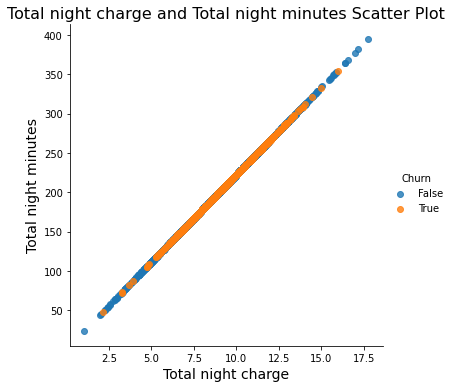

In [33]:
fig = plt.figure()
fig = sns.lmplot('Total night charge','Total night minutes',hue='Churn', data=df,fit_reg=False)
plt.xlabel('Total night charge',fontsize= 14)
plt.ylabel('Total night minutes',fontsize= 14)
plt.title("Total night charge and Total night minutes Scatter Plot",fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

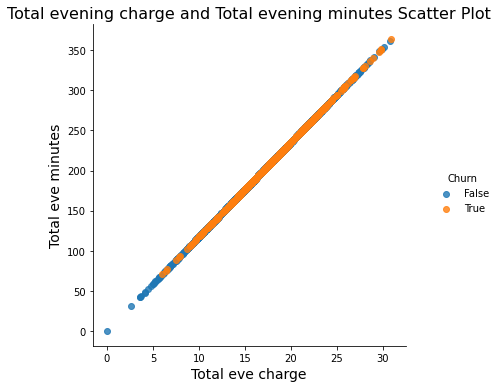

In [32]:
fig = plt.figure()
fig = sns.lmplot('Total eve charge','Total eve minutes', hue='Churn', data=df,fit_reg=False)
plt.xlabel('Total eve charge',fontsize= 14)
plt.ylabel('Total eve minutes',fontsize= 14)
plt.title("Total evening charge and Total evening minutes Scatter Plot",fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

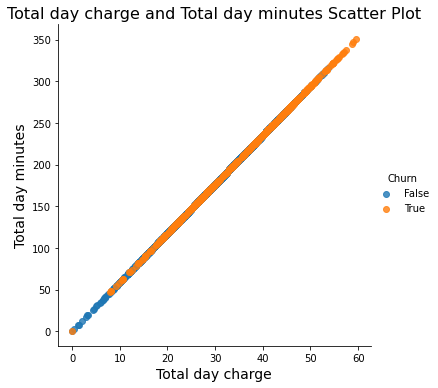

In [25]:
fig = plt.figure()
fig = sns.lmplot('Total day charge','Total day minutes', hue='Churn', data=df,fit_reg=False)
plt.xlabel('Total day charge',fontsize= 14)
plt.ylabel('Total day minutes',fontsize= 14)
plt.title("Total day charge and Total day minutes Scatter Plot",fontsize = 16)
plt.show()

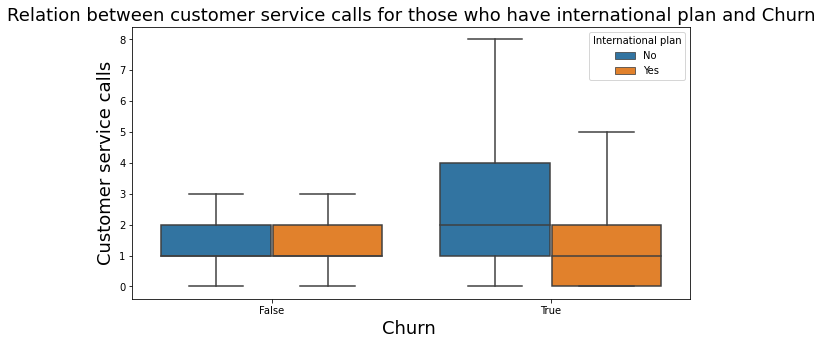

In [ ]:
#Multivariate Analysis
#To visualize the difference in Customer service calls between churners and non-churners who are having international plan
sns.boxplot(x = 'Churn',
            y = 'Customer service calls',
            data = df,
            sym = "",                  
            hue = "International plan") 
plt.xlabel('Churn ', fontsize=18)
plt.ylabel('Customer service calls', fontsize=18)
plt.title('Relation between customer service calls for those who have international plan and Churn',fontsize=18)

plt.show()

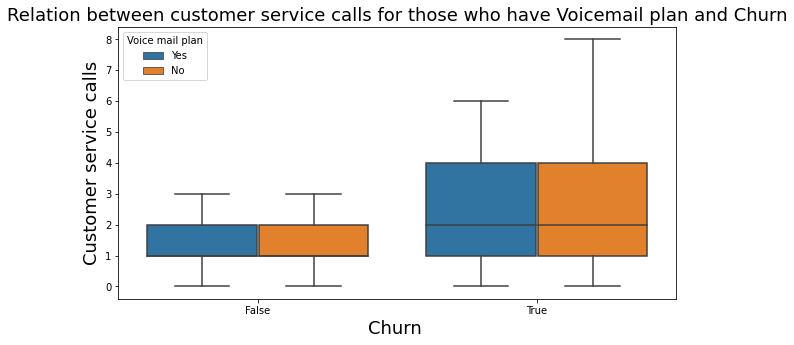

In [ ]:
#To visualize the difference in Customer service calls between churners and non-churners who are having Voicemail plan
sns.boxplot(x = 'Churn',
            y = 'Customer service calls',
            data = df,
            sym = "",                  
            hue = "Voice mail plan") 
plt.xlabel('Churn ', fontsize=18)
plt.ylabel('Customer service calls', fontsize=18)
plt.title('Relation between customer service calls for those who have Voicemail plan and Churn',fontsize=18)

plt.show()

In [ ]:
more_customer_call=df[df['Customer service calls'] > 3]
more_customer_call.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
14,IA,62,415,No,No,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
